In [6]:
!pip install 'optimum[onnxruntime]' onnxruntime-gpu matplotlib easynmt sacremoses datasets --quiet

import nltk
nltk.download('punkt_tab')

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.2/226.2 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/8

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Emotions Analysis

In [7]:
import datasets

dataset_name, dataset_config_name = "go_emotions", "simplified"
emotion_dataset_dict = datasets.load_dataset(dataset_name, dataset_config_name)

split_name = "test"
print(emotion_dataset_dict[split_name].info.description)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.40k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.77M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/350k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/347k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

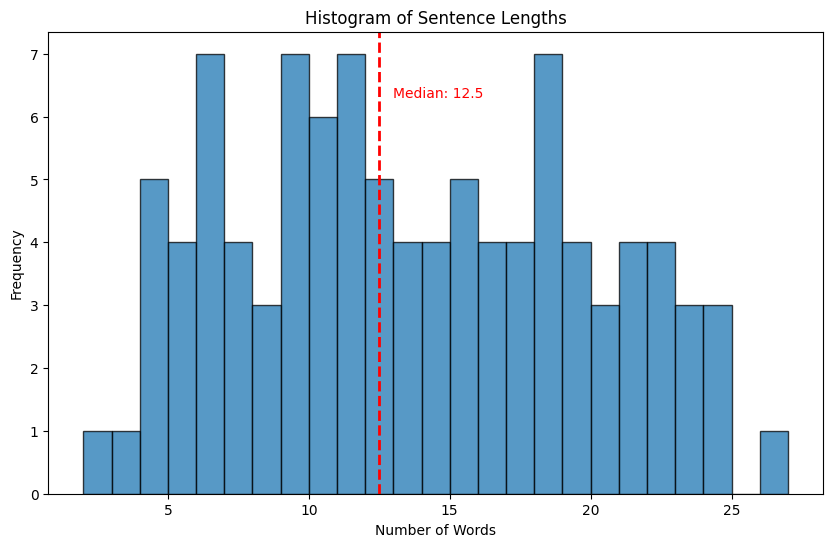

Representative Sentence with Length Closest to the Median:
if the pain doesn't go away after 4 hours or so, it's broke.


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Example list of sentences
sentences = emotion_dataset_dict[split_name]["text"][:100]

# Step 1: Calculate the length of each sentence in words
sentence_lengths = [len(sentence.split()) for sentence in sentences]

# Step 2: Plot the histogram of sentence lengths
plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=range(min(sentence_lengths), max(sentence_lengths) + 2), alpha=0.75, edgecolor='black')

# Step 3: Highlight the median length
median_length = np.median(sentence_lengths)
plt.axvline(median_length, color='red', linestyle='dashed', linewidth=2)
plt.text(median_length + 0.5, max(np.histogram(sentence_lengths, bins=range(min(sentence_lengths), max(sentence_lengths) + 2))[0]) * 0.9,
         f'Median: {median_length}', color='red')

plt.title('Histogram of Sentence Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Step 4: Extract a representative sentence with length closest to the median
closest_sentence = min(sentences, key=lambda x: abs(len(x.split()) - median_length))

print("Representative Sentence with Length Closest to the Median:")
print(closest_sentence)

## Translation times

In [9]:
from easynmt import EasyNMT
model = EasyNMT('opus-mt', device='cpu')
# model = EasyNMT('m2m_100_418M', device='cpu')
# model = EasyNMT('m2m_100_1.2B', device='cpu')

11.9kB [00:00, 12.4MB/s]                   
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
%%time
print(model.translate(emotion_dataset_dict[split_name]["text"][:100], target_lang='it'))

100%|██████████| 938k/938k [00:00<00:00, 9.61MB/s]
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/789k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/814k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.35M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/343M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

## Perfomance

In [ ]:
import numpy as np

labels = emotion_dataset_dict[split_name].features["labels"].feature.names
idx2emotion = {i: l for i, l in enumerate(labels)}
emotion2idx = {l: i for i, l in enumerate(labels)}
print(idx2emotion)

num_items, num_labels = len(emotion_dataset_dict[split_name]), len(labels)
y_targets_all = np.zeros((num_items, num_labels), dtype=int)
for i, labels_indices in enumerate(emotion_dataset_dict[split_name]["labels"]):
    for label_index in labels_indices:
        y_targets_all[i, label_index] = 1

y_targets_all[:3]

{0: 'admiration', 1: 'amusement', 2: 'anger', 3: 'annoyance', 4: 'approval', 5: 'caring', 6: 'confusion', 7: 'curiosity', 8: 'desire', 9: 'disappointment', 10: 'disapproval', 11: 'disgust', 12: 'embarrassment', 13: 'excitement', 14: 'fear', 15: 'gratitude', 16: 'grief', 17: 'joy', 18: 'love', 19: 'nervousness', 20: 'optimism', 21: 'pride', 22: 'realization', 23: 'relief', 24: 'remorse', 25: 'sadness', 26: 'surprise', 27: 'neutral'}


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]])

### Zero-shot

#### 27 emotions

In [ ]:
from transformers import pipeline

hypothesis_template = "The emotion expressed is {}" # "This text is about {}"
classes_verbalized = labels
zeroshot_classifier = pipeline("zero-shot-classification", model="MoritzLaurer/deberta-v3-base-zeroshot-v2.0", device='cuda')  # change the model identifier here

In [ ]:
%%time

model_outputs = zeroshot_classifier(emotion_dataset_dict[split_name]['text'][:3], classes_verbalized, hypothesis_template=hypothesis_template, multi_label=True)

CPU times: user 4.06 s, sys: 77.3 ms, total: 4.14 s
Wall time: 4.22 s


In [ ]:
threshold = .5

y_pred_all = np.zeros((num_items, num_labels), dtype=int)
for i, pred in enumerate(model_outputs):
    for label, score in zip(pred["labels"], pred["scores"]):
        label_index = emotion2idx[label]
        y_pred_all[i, label_index] = 1 if score>threshold else 0

y_pred_all[:3]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0]])

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
p, r, f1, _ = precision_recall_fscore_support(y_targets_all, y_pred_all, average='macro')
print(f'Precision: {p}')
print(f'Recall: {r}')
print(f'F1: {f1}\n')


p, r, f1, s = precision_recall_fscore_support(y_targets_all, y_pred_all, average=None)
print(f'Precision: {p}')
print(f'Recall: {r}')
print(f'F1: {f1}')
print(f'Support: {s}')

Precision: 0.10714285714285714
Recall: 0.0006465400449450381
F1: 0.0012832149561984967

Precision: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0.]
Recall: [0.00198413 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00970874 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00641026 0.         0.        ]
F1: [0.0039604  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.01923077 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.01273885 0.         0.        ]
Support: [ 504  264  198  320  351  135  153  284   83  151  267  123   37  103
   78  352    6  161  238   23  186   16  145   11   56  156  141 1787]


/home/navya/Projects/onnx test classificatoin/.onnx/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/navya/Projects/onnx test classificatoin/.onnx/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 7 emotions

In [ ]:
import numpy as np

labels = emotion_dataset_dict[split_name].features["labels"].feature.names
idx2emotion = {i: l for i, l in enumerate(labels)}
emotion2idx = {l: i for i, l in enumerate(labels)}
print(idx2emotion)


eekman_mapping = {
    "anger": ["anger", "annoyance", "disapproval"],
    "disgust": ["disgust"],
    "fear": ["fear", "nervousness"],
    "joy": ["joy", "amusement", "approval", "excitement", "gratitude",  "love", "optimism", "relief", "pride", "admiration", "desire", "caring"],
    "sadness": ["sadness", "disappointment", "embarrassment", "grief",  "remorse"],
    "surprise": ["surprise", "realization", "confusion", "curiosity"],
    "neutral": ["neutral"]
}

emotion2eekman_emotion = {}
for key, emotions in eekman_mapping.items():
    for emotion in emotions:
        emotion2eekman_emotion[emotion] = key

labels = eekman_mapping.keys()#emotion_dataset_dict[split_name].features["labels"].feature.names
idx2eekman_emotion = {i: l for i, l in enumerate(labels)}
eekman_emotion2idx = {l: i for i, l in enumerate(labels)}
print(idx2eekman_emotion)


num_items, num_labels = len(emotion_dataset_dict[split_name]), len(labels)
y_targets_all = np.zeros((num_items, num_labels), dtype=int)
for i, labels_indices in enumerate(emotion_dataset_dict[split_name]["labels"]):
    for label_index in labels_indices:
        emotion = idx2emotion[label_index]
        eekman_emotion = emotion2eekman_emotion[emotion]
        label_index = eekman_emotion2idx[eekman_emotion]

        y_targets_all[i, label_index] = 1

y_targets_all[:3]

{0: 'admiration', 1: 'amusement', 2: 'anger', 3: 'annoyance', 4: 'approval', 5: 'caring', 6: 'confusion', 7: 'curiosity', 8: 'desire', 9: 'disappointment', 10: 'disapproval', 11: 'disgust', 12: 'embarrassment', 13: 'excitement', 14: 'fear', 15: 'gratitude', 16: 'grief', 17: 'joy', 18: 'love', 19: 'nervousness', 20: 'optimism', 21: 'pride', 22: 'realization', 23: 'relief', 24: 'remorse', 25: 'sadness', 26: 'surprise', 27: 'neutral'}
{0: 'anger', 1: 'disgust', 2: 'fear', 3: 'joy', 4: 'sadness', 5: 'surprise', 6: 'neutral'}


array([[0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0]])

In [ ]:
from transformers import pipeline

hypothesis_template = "The sentiment of this text is {}" #"The emotion expressed is {}" # "This text is about {}"
classes_verbalized = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']
zeroshot_classifier = pipeline("zero-shot-classification", model="MoritzLaurer/deberta-v3-large-zeroshot-v2.0", device='cpu')  # change the model identifier here


In [ ]:
%%time

model_outputs = zeroshot_classifier(
    emotion_dataset_dict[split_name]['text'][:100],
    classes_verbalized,
    hypothesis_template=hypothesis_template,
    multi_label=True
)

CPU times: user 32min 44s, sys: 3.73 s, total: 32min 48s
Wall time: 5min 34s


In [ ]:
threshold = .5

y_pred_all = np.zeros((num_items, num_labels), dtype=int)
for i, pred in enumerate(model_outputs):
    for label, score in zip(pred["labels"], pred["scores"]):
        label_index = eekman_emotion2idx[label]
        y_pred_all[i, label_index] = 1 if score>threshold else 0

y_pred_all[:3]

array([[0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0]])

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
p, r, f1, _ = precision_recall_fscore_support(y_targets_all, y_pred_all, average='macro')
print(f'Precision: {p}')
print(f'Recall: {r}')
print(f'F1: {f1}\n')


p, r, f1, s = precision_recall_fscore_support(y_targets_all, y_pred_all, average=None)
print(f'Precision: {p}')
print(f'Recall: {r}')
print(f'F1: {f1}')
print(f'Support: {s}')

Precision: 0.38878462827447746
Recall: 0.5431334844281865
F1: 0.40508146585790966

Precision: [0.37946838 0.08053691 0.24067797 0.76405384 0.3987976  0.36198347
 0.49597424]
Recall: [0.57024793 0.68292683 0.7244898  0.45865019 0.52506596 0.32348597
 0.51706771]
F1: [0.4556962  0.14408233 0.36132316 0.57321057 0.45330296 0.34165367
 0.50630137]
Support: [ 726  123   98 2104  379  677 1787]


### Fine-tuned

In [ ]:
from transformers import AutoTokenizer, pipeline

classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None, device='cuda')

In [ ]:
%%time
model_outputs = classifier(emotion_dataset_dict[split_name]["text"])

CPU times: user 1min 35s, sys: 97.7 ms, total: 1min 36s
Wall time: 1min 36s


In [ ]:
threshold = .5

y_pred_all = np.zeros((num_items, num_labels), dtype=int)
for i, preds in enumerate(model_outputs):
    for pred in preds:
        label, score = pred["label"], pred["score"]
        label_index = emotion2idx[label]
        y_pred_all[i, label_index] = 1 if score>threshold else 0

y_pred_all[:3]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0]])

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
p, r, f1, _ = precision_recall_fscore_support(y_targets_all, y_pred_all, average='macro')
print(f'Precision: {p}')
print(f'Recall: {r}')
print(f'F1: {f1}\n')


p, r, f1, s = precision_recall_fscore_support(y_targets_all, y_pred_all, average=None)
print(f'Precision: {p}')
print(f'Recall: {r}')
print(f'F1: {f1}')
print(f'Support: {s}')

Precision: 0.2857142857142857
Recall: 0.0005127275385208509
F1: 0.0010232133039150583

Precision: [0. 0. 0. 1. 1. 0. 0.]
Recall: [0.         0.         0.         0.00095057 0.00263852 0.
 0.        ]
F1: [0.         0.         0.         0.00189934 0.00526316 0.
 0.        ]
Support: [ 726  123   98 2104  379  677 1787]


/home/navya/Projects/onnx test classificatoin/.onnx/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/navya/Projects/onnx test classificatoin/.onnx/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### INT8

In [ ]:
from transformers import AutoTokenizer, pipeline
from optimum.onnxruntime import ORTModelForSequenceClassification

model_id = "SamLowe/roberta-base-go_emotions-onnx"
file_name = "onnx/model_quantized.onnx"

model = ORTModelForSequenceClassification.from_pretrained(model_id, file_name=file_name)
tokenizer = AutoTokenizer.from_pretrained(model_id)

onnx_classifier = pipeline(
    task="text-classification",
    model=model,
    tokenizer=tokenizer,
    top_k=None,
    function_to_apply="sigmoid",  # optional as is the default for the task
    device='cuda'
)

The ONNX file onnx/model_quantized.onnx is not a regular name used in optimum.onnxruntime, the ORTModel might not behave as expected.
use_io_binding was set to False, setting it to True because it can provide a huge speedup on GPUs. It is possible to disable this feature manually by setting the use_io_binding attribute back to False.
2024-08-22 13:00:59.711454713 [W:onnxruntime:, transformer_memcpy.cc:74 ApplyImpl] 294 Memcpy nodes are added to the graph torch_jit for CUDAExecutionProvider. It might have negative impact on performance (including unable to run CUDA graph). Set session_options.log_severity_level=1 to see the detail logs before this message.
2024-08-22 13:00:59.718159494 [W:onnxruntime:, session_state.cc:1166 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2024-08-22 13:00:59.718173546 [W:onnxr

In [ ]:
%%time
model_outputs = onnx_classifier(emotion_dataset_dict[split_name]["text"])
# gives a list of outputs, each a list of dicts (one per label)

print(model_outputs)

[[{'label': 'remorse', 'score': 0.6910610795021057}, {'label': 'sadness', 'score': 0.5471704602241516}, {'label': 'love', 'score': 0.3713338375091553}, {'label': 'caring', 'score': 0.057167816907167435}, {'label': 'gratitude', 'score': 0.03556112200021744}, {'label': 'disappointment', 'score': 0.034887250512838364}, {'label': 'approval', 'score': 0.031029539182782173}, {'label': 'grief', 'score': 0.01943536289036274}, {'label': 'admiration', 'score': 0.01847640797495842}, {'label': 'optimism', 'score': 0.016176048666238785}, {'label': 'disapproval', 'score': 0.015770744532346725}, {'label': 'realization', 'score': 0.014730178751051426}, {'label': 'desire', 'score': 0.011576189659535885}, {'label': 'curiosity', 'score': 0.01057030912488699}, {'label': 'confusion', 'score': 0.010292642749845982}, {'label': 'anger', 'score': 0.00864159595221281}, {'label': 'embarrassment', 'score': 0.008287490345537663}, {'label': 'joy', 'score': 0.007821112871170044}, {'label': 'amusement', 'score': 0.00

In [ ]:
threshold = .5

y_pred_all = np.zeros((num_items, num_labels), dtype=int)
for i, preds in enumerate(model_outputs):
    for pred in preds:
        label, score = pred["label"], pred["score"]
        label_index = emotion2idx[label]
        y_pred_all[i, label_index] = 1 if score>threshold else 0

y_pred_all[:3]

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
p, r, f1, _ = precision_recall_fscore_support(y_targets_all, y_pred_all, average='macro')
print(f'Precision: {p}')
print(f'Recall: {r}')
print(f'F1: {f1}\n')


p, r, f1, s = precision_recall_fscore_support(y_targets_all, y_pred_all, average=None)
print(f'Precision: {p}')
print(f'Recall: {r}')
print(f'F1: {f1}')
print(f'Support: {s}')

Precision: 0.5749649619698306
Recall: 0.3993721505892145
F1: 0.45160144254728574

Precision: [0.73245614 0.78911565 0.61538462 0.49090909 0.58469945 0.48863636
 0.48201439 0.54146341 0.65384615 0.6122449  0.49689441 0.70689655
 0.8        0.62068966 0.734375   0.95975232 0.         0.66901408
 0.77394636 0.6        0.67924528 0.         0.48780488 0.
 0.5443038  0.61666667 0.725      0.69365976]
Recall: [0.66269841 0.87878788 0.36363636 0.16875    0.3048433  0.31851852
 0.4379085  0.39084507 0.40963855 0.1986755  0.29962547 0.33333333
 0.21621622 0.34951456 0.6025641  0.88068182 0.         0.59006211
 0.8487395  0.13043478 0.38709677 0.         0.13793103 0.
 0.76785714 0.47435897 0.41134752 0.61835478]
F1: [0.69583333 0.83154122 0.45714286 0.25116279 0.40074906 0.38565022
 0.45890411 0.45398773 0.5037037  0.3        0.37383178 0.45303867
 0.34042553 0.44720497 0.66197183 0.91851852 0.         0.62706271
 0.80961924 0.21428571 0.49315068 0.         0.21505376 0.
 0.63703704 0.53623188 

/home/navya/Projects/onnx test classificatoin/.onnx/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/navya/Projects/onnx test classificatoin/.onnx/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
